# LC -23 
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>
SB/FIN/21/0000<br>


# Problem Identification

The core problem Frankot Motors is facing is the intensification of competition in the Ghanaian car dealership industry, which is negatively impacting the sales performance of small and mid-size dealerships, including their own. To address this, they require a strategic approach to optimally price their cars, aiming to maximize revenues and profits in a competitive market. The task involves conducting exploratory data analysis to identify key factors influencing car sales and developing a predictive model to estimate car prices based on these factors, enabling informed pricing decisions.

## Exploratory Data Analysis

In [331]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as pp

import seaborn as sns
import numpy as np

#Keep the chart in the jupyter notebook
%matplotlib inline

In [332]:
#Loading the dataset
df=pd.read_csv('car_sales.csv')

In [333]:
df

,manufact,model,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,Acura,Integra,16.919,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,Acura,TL,39.384,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,Acura,CL,14.114,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,Acura,RL,8.588,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,Audi,A4,20.397,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0
153,Volvo,S70,15.245,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0
154,Volvo,V70,17.531,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0
155,Volvo,C70,3.493,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0


In [334]:
#Checking the data types of the columns in our dataset
df.dtypes

manufact     object
model        object
sales       float64
price       float64
engine_s    float64
horsepow    float64
wheelbas    float64
width       float64
length      float64
curb_wgt    float64
fuel_cap    float64
mpg         float64
dtype: object

In [335]:
#determing the number of rows and columns 
df.shape

(157, 12)

In [336]:
#checking the statistical summary for numerical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,157.0,52.998076,68.029422,0.110,14.1140,29.450,67.9560,540.561
price,155.0,27.390755,14.351653,9.235,18.0175,22.799,31.9475,85.500
engine_s,156.0,3.060897,1.044653,1.000,2.3000,3.000,3.5750,8.000
horsepow,156.0,185.948718,56.700321,55.000,149.5000,177.500,215.0000,450.000
wheelbas,156.0,107.487179,7.641303,92.600,103.0000,107.000,112.2000,138.700
width,156.0,71.150000,3.451872,62.600,68.4000,70.550,73.4250,79.900
length,156.0,187.343590,13.431754,149.400,177.5750,187.900,196.1250,224.500
curb_wgt,155.0,3.378026,0.630502,1.895,2.9710,3.342,3.7995,5.572
fuel_cap,156.0,17.951923,3.887921,10.300,15.8000,17.200,19.5750,32.000
mpg,154.0,23.843506,4.282720,15.000,21.0000,24.000,26.0000,45.000


In [337]:
# Summary statistics for categorical features
print(df.describe(include=['O']))

       manufact model
count       157   157
unique       30   156
top       Dodge  Neon
freq         11     2


In [338]:
#checking the correlation
df.corr()

,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
sales,1.000000,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016681
price,-0.304734,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492404
engine_s,0.019983,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734625
horsepow,-0.197756,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611411
wheelbas,0.358179,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.498090
width,0.140918,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602645
length,0.254980,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446900
curb_wgt,0.008628,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818492
fuel_cap,0.086540,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801604
mpg,-0.016681,-0.492404,-0.734625,-0.611411,-0.498090,-0.602645,-0.446900,-0.818492,-0.801604,1.000000


Based on the correlation above below are the possible insights to draw from it;
<br><br>
**Sales** is positively correlated with price, engine size, horsepower, wheelbase, width, length, and curb weight. This means that cars with higher sales tend to have higher values for these other features.<br>
**Price** is positively correlated with engine size, horsepower, wheelbase, width, length, and curb weight. This means that more expensive cars tend to have larger engines, more horsepower, and larger dimensions.<br>
**Engine size** is positively correlated with horsepower, wheelbase, width, length, and curb weight. This means that cars with larger engines tend to have more horsepower and larger dimensions.<br>
**Horsepower** is positively correlated with wheelbase, width, length, and curb weight. This means that cars with more horsepower tend to have larger dimensions.<br>
**Wheelbase** is positively correlated with width, length, and curb weight. This means that cars with longer wheelbases tend to be wider, longer, and heavier.<br>
**Width** is positively correlated with length and curb weight. This means that wider cars tend to be longer and heavier.<br>
**Length** is positively correlated with curb weight. This means that longer cars tend to be heavier.<br>
**Curb weight** is positively correlated with fuel capacity. This means that heavier cars tend to have larger fuel tanks.<br>
**Fuel capacity** is positively correlated with mpg. This means that cars with larger fuel tanks tend to have better fuel economy.<br>


# Univariate Analysis


Checking for the distribution of data for some columns in our datasaet

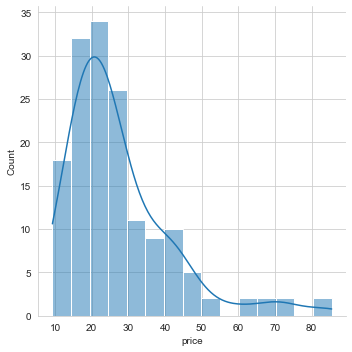

In [339]:
sns.displot(data=df, x='price', kde=True)

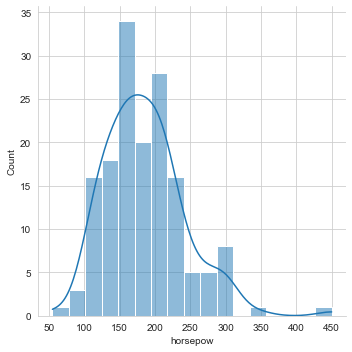

In [340]:
sns.displot(data=df, x='horsepow', kde=True)

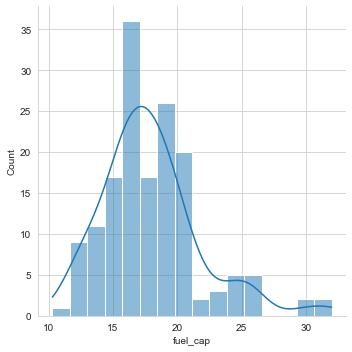

In [341]:
sns.displot(data=df, x='fuel_cap', kde=True)

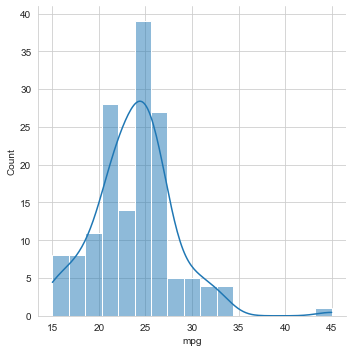

In [342]:
sns.displot(data=df, x='mpg', kde=True)
pp.show()

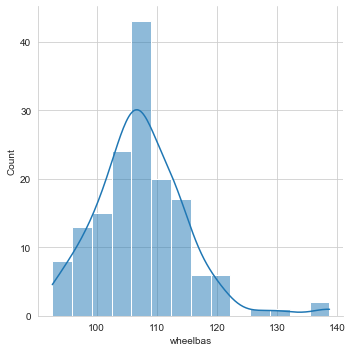

In [343]:
sns.displot(data=df, x='wheelbas', kde=True)

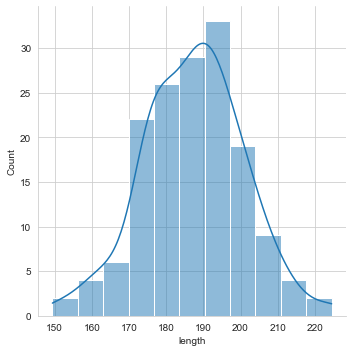

In [344]:
sns.displot(data=df, x='length', kde=True)

<AxesSubplot:xlabel='price'>

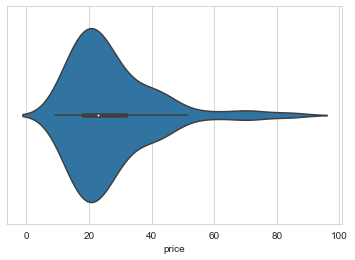

In [345]:
sns.violinplot(data=df, x='price')

In [346]:
# Checking for the manufacturers in our dataset
df['manufact'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-Benz', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [347]:
#Checking for the number of cars by each manufacturer
df['manufact'].value_counts()

Dodge            11
Ford             11
Toyota            9
Chevrolet         9
Mercedes-Benz     9
Mitsubishi        7
Nissan            7
Chrysler          7
Volvo             6
Oldsmobile        6
Lexus             6
Mercury           6
Pontiac           6
Volkswagen        6
Saturn            5
Cadillac          5
Honda             5
Plymouth          4
Acura             4
Buick             4
Audi              3
Jeep              3
Porsche           3
Hyundai           3
BMW               3
Lincoln           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: manufact, dtype: int64

From our observation it is shown that, Dodge and Ford has the highest number of cars and Infiniti has the least number of cars in our dataset

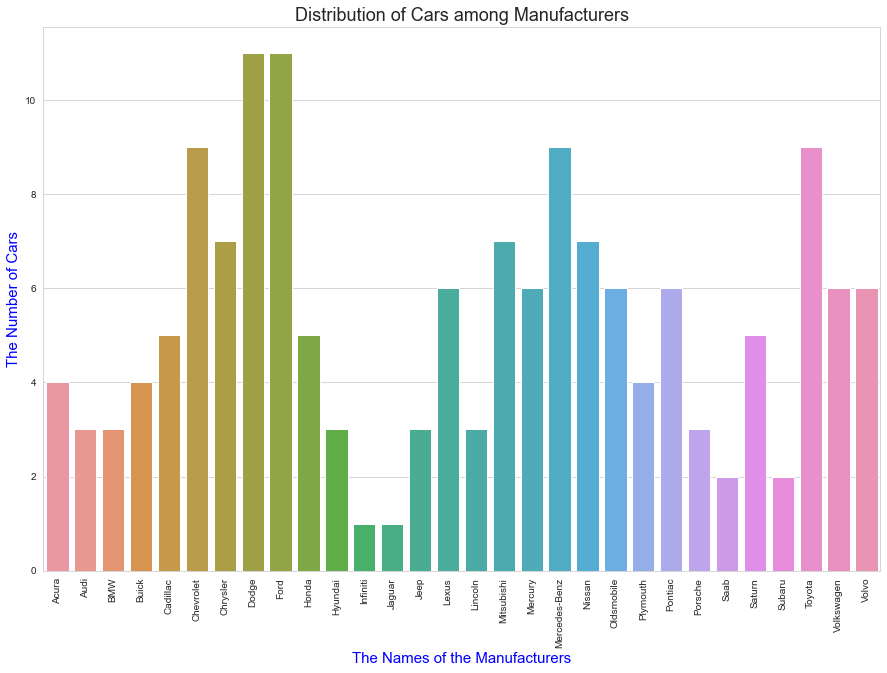

In [348]:
#Displaying a graphical chart of the number of cars by the manufacturers
pp.figure(figsize=(15,10))
sns.countplot(data=df,x='manufact')
pp.xticks(rotation=90)
pp.xlabel('The Names of the Manufacturers',color='blue', fontsize=15)
pp.ylabel('The Number of Cars',color='blue',fontsize=15)
pp.title('Distribution of Cars among Manufacturers', fontsize=18)
pp.show()

# Bivariate Analysis

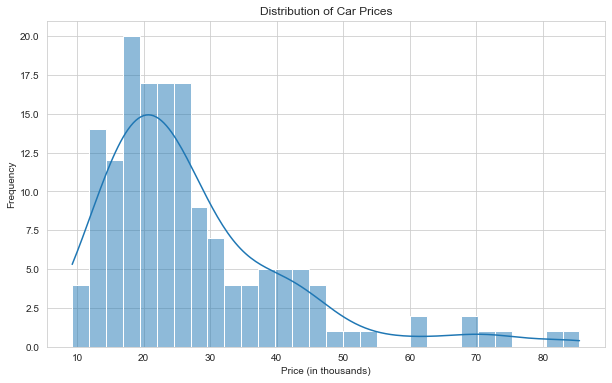

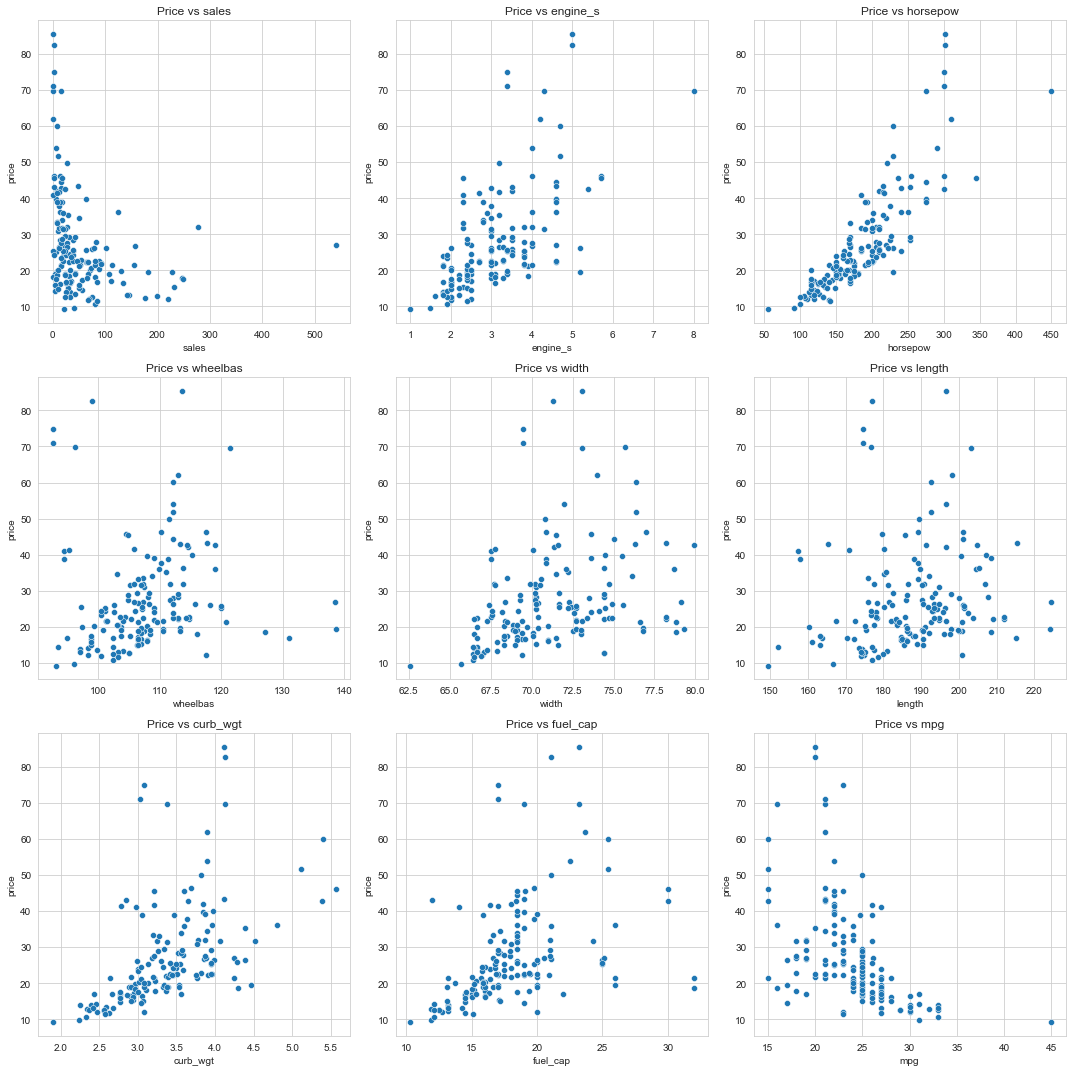

In [349]:
# Set the aesthetic style of the plots
# sns.set_style("whitegrid")

# Exploring the distribution of car prices
pp.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
pp.title('Distribution of Car Prices')
pp.xlabel('Price (in thousands)')
pp.ylabel('Frequency')
pp.show()

# Exploring the relationship between price and other numeric features
numeric_features = ['sales', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
fig, axs = pp.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=df, x=feature, y='price', ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f'Price vs {feature}')

pp.tight_layout()
pp.show()


#### Analysis on Manufact and Model

In [350]:
dfm=df[['manufact','model']]

In [351]:
dfm

,manufact,model
0,Acura,Integra
1,Acura,TL
2,Acura,CL
3,Acura,RL
4,Audi,A4
...,...,...
152,Volvo,V40
153,Volvo,S70
154,Volvo,V70
155,Volvo,C70


In [352]:
#Grouping manufacturers by the number of models of produced by each manufacturer
df.groupby('manufact')['model'].value_counts()

manufact  model  
Acura     CL         1
          Integra    1
          RL         1
          TL         1
Audi      A4         1
                    ..
Volvo     S40        1
          S70        1
          S80        1
          V40        1
          V70        1
Name: model, Length: 157, dtype: int64

In [353]:
df.columns

Index(['manufact', 'model', 'sales', 'price', 'engine_s', 'horsepow',
       'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg'],
      dtype='object')

#### Analysis on Price and Horsepow

In [354]:
ph=df[['price','horsepow']]

In [355]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     155 non-null    float64
 1   horsepow  156 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [356]:
ph.describe().T

,count,mean,std,min,25%,50%,75%,max
price,155.0,27.390755,14.351653,9.235,18.0175,22.799,31.9475,85.5
horsepow,156.0,185.948718,56.700321,55.000,149.5000,177.500,215.0000,450.0


In [357]:
ph.corr()

,price,horsepow
price,1.000000,0.839744
horsepow,0.839744,1.000000


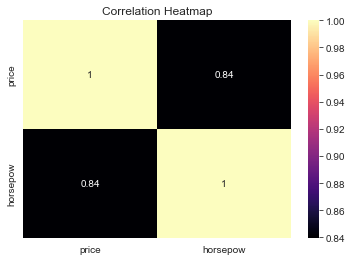

In [358]:
sns.heatmap(ph.corr(),cmap='magma',annot=True)
pp.title('Correlation Heatmap')
pp.show()

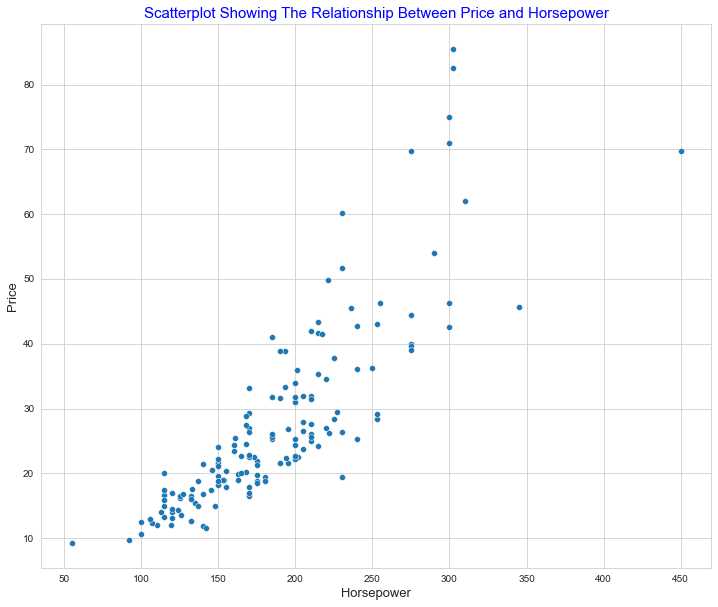

In [359]:
# Scatterplot of Price and Horsepower
#Resizing the chart
pp.figure(figsize=(12,10))
sns.scatterplot(data=ph,x='horsepow',y='price')
#Giving it a title
pp.title("Scatterplot Showing The Relationship Between Price and Horsepower",fontsize=15,color='b')
#Labelling the y-axis
pp.ylabel('Price',fontsize=13)
#Labelling the x-axis
pp.xlabel('Horsepower', fontsize=13)
pp.show()

#### Analysis on Price and Engine_s

In [360]:
pe=df[['price','engine_s']]

In [361]:
pe.corr()

,price,engine_s
price,1.000000,0.626875
engine_s,0.626875,1.000000


In [362]:
pe.describe().T

,count,mean,std,min,25%,50%,75%,max
price,155.0,27.390755,14.351653,9.235,18.0175,22.799,31.9475,85.5
engine_s,156.0,3.060897,1.044653,1.000,2.3000,3.000,3.5750,8.0


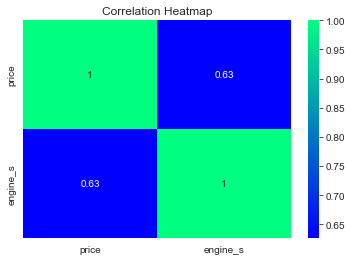

In [363]:
#Displaying the correlation on a heatmap
sns.heatmap(pe.corr(),cmap='winter',annot=True)
pp.title('Correlation Heatmap')
pp.show()

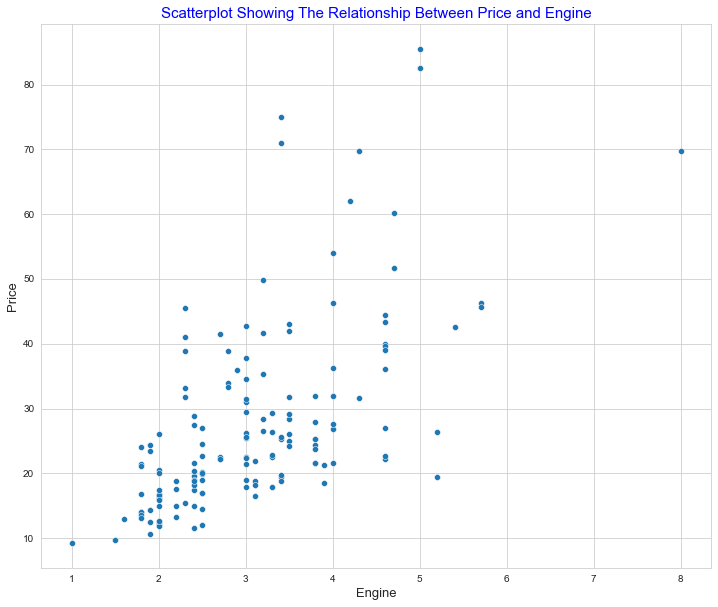

In [364]:
# Scatterplot of Price and Engine
pp.figure(figsize=(12,10))
sns.scatterplot(data=pe,x='engine_s',y='price')
pp.title("Scatterplot Showing The Relationship Between Price and Engine",fontsize=15,color='b')
pp.ylabel('Price',fontsize=13)
pp.xlabel('Engine', fontsize=13)
pp.show()

#### Analysis on Price and Mpg

In [365]:
#Analysis on Price and Mpg
pm=df[['price','mpg']]

In [366]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   155 non-null    float64
 1   mpg     154 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [367]:
pm.describe().T

,count,mean,std,min,25%,50%,75%,max
price,155.0,27.390755,14.351653,9.235,18.0175,22.799,31.9475,85.5
mpg,154.0,23.843506,4.282720,15.000,21.0000,24.000,26.0000,45.0


In [368]:
pm.corr()

,price,mpg
price,1.000000,-0.492404
mpg,-0.492404,1.000000


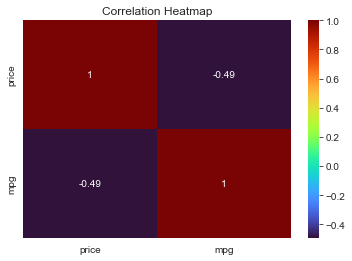

In [369]:
sns.heatmap(pm.corr(),cmap='turbo',annot=True)
pp.title('Correlation Heatmap')
pp.show()

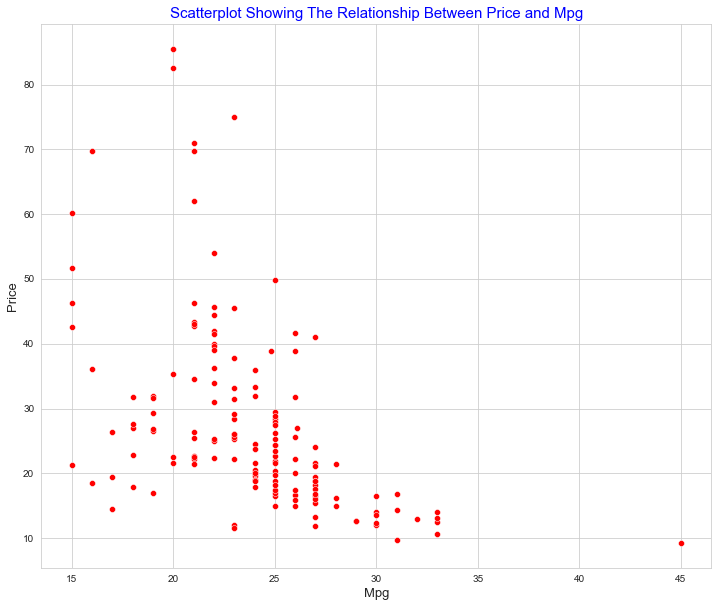

In [370]:
# Scatterplot of Price and MPG
pp.figure(figsize=(12,10))
sns.scatterplot(data=pm,x='mpg',y='price',color='r')
pp.title("Scatterplot Showing The Relationship Between Price and Mpg",fontsize=15,color='b')
pp.ylabel('Price',fontsize=13)
pp.xlabel('Mpg', fontsize=13)
pp.show()

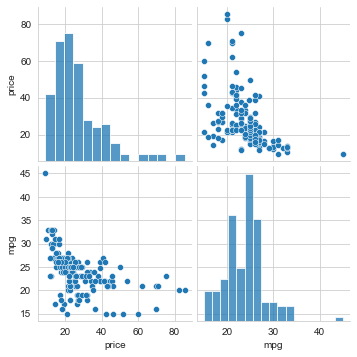

In [371]:
#Displaying pairplot of price and mpg
sns.pairplot(pm)
#Displaying the chart
pp.show()

#### Analysis on engine_s and Horsepow

In [372]:
he=df[['engine_s','horsepow']]
he

,engine_s,horsepow
0,1.8,140.0
1,3.2,225.0
2,3.2,225.0
3,3.5,210.0
4,1.8,150.0
...,...,...
152,1.9,160.0
153,2.4,168.0
154,2.4,168.0
155,2.3,236.0


In [373]:
#Finding the correlation of the engine_s and horsepow
he.corr()

,engine_s,horsepow
engine_s,1.00000,0.83736
horsepow,0.83736,1.00000


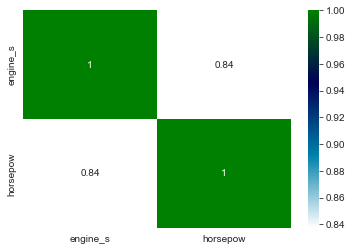

In [374]:
#Correlation on heatmap
sns.heatmap(he.corr(),cmap='ocean_r',annot=True)
pp.show()

In [375]:
#Grouping Manufacturers by price
mp=df.groupby('manufact')['price']

In [376]:
#Find the mininmum price by each manufacturer
mp.min()

manufact
Acura            21.500
Audi             23.990
BMW              26.990
Buick            21.975
Cadillac         31.010
Chevrolet         9.235
Chrysler         16.480
Dodge            12.640
Ford             12.050
Honda            12.885
Hyundai           9.699
Infiniti         29.465
Jaguar           42.800
Jeep             14.460
Lexus            31.505
Lincoln          39.080
Mercedes-Benz    31.750
Mercury          16.240
Mitsubishi       13.987
Nissan           13.499
Oldsmobile       18.145
Plymouth         12.640
Pontiac          19.720
Porsche          41.430
Saab             26.100
Saturn           10.685
Subaru           20.095
Toyota           11.528
Volkswagen       14.900
Volvo            23.400
Name: price, dtype: float64

In [377]:
#Finding the maximum price by each manufacturer
mp.max()

manufact
Acura            42.000
Audi             62.000
BMW              38.900
Buick            31.965
Cadillac         46.225
Chevrolet        45.705
Chrysler         29.185
Dodge            69.725
Ford             36.135
Honda            26.600
Hyundai          14.999
Infiniti         29.465
Jaguar           42.800
Jeep             26.895
Lexus            60.105
Lincoln          43.330
Mercedes-Benz    85.500
Mercury          27.560
Mitsubishi       31.807
Nissan           29.299
Oldsmobile       36.229
Plymouth         43.000
Pontiac          25.635
Porsche          74.970
Saab             33.120
Saturn           18.835
Subaru           22.695
Toyota           51.728
Volkswagen       21.200
Volvo            45.500
Name: price, dtype: float64

In [378]:
#finding the mean of the prices by each manufacturer
mp.mean()

manufact
Acura            30.633333
Audi             39.980000
BMW              33.096667
Buick            26.781250
Cadillac         40.254000
Chevrolet        20.022778
Chrysler         23.430833
Dodge            24.213636
Ford             21.047273
Honda            20.277000
Hyundai          12.165667
Infiniti         29.465000
Jaguar           42.800000
Jeep             20.991667
Lexus            44.055000
Lincoln          41.690000
Mercedes-Benz    52.916667
Mercury          20.748333
Mitsubishi       22.167429
Nissan           22.360714
Oldsmobile       25.622833
Plymouth         22.642500
Pontiac          22.949167
Porsche          62.473333
Saab             29.610000
Saturn           14.271000
Subaru           21.395000
Toyota           21.982889
Volkswagen       17.698333
Volvo            30.933333
Name: price, dtype: float64

## Data Pre-processing

In [379]:
#Checking for missing values
df.isnull().sum()

manufact    0
model       0
sales       0
price       2
engine_s    1
horsepow    1
wheelbas    1
width       1
length      1
curb_wgt    2
fuel_cap    1
mpg         3
dtype: int64

In [380]:
#displaying the rows with missing values or NaN values
missing_rows = df[df.isnull().any(axis=1)]

In [381]:
missing_rows

,manufact,model,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
2,Acura,CL,14.114,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
15,Cadillac,Seville,15.943,44.475,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0
33,Chrysler,Town & Country,53.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Dodge,Intrepid,88.028,22.505,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN
109,Oldsmobile,Intrigue,38.554,24.150,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN


Based on the dataframe above, we will impute the missing values considering the different manufacturers represented in the dataset. As the values may vary significantly across manufacturers, calculating the mean of all the values regardless of manufacturer would not be appropriate. Instead, we will determine the mean of the missing values column for each manufacturer separately. This approach ensures that the imputed values are aligned with the specific characteristics and pricing trends of each manufacturer.

In [382]:
# Calculating the mean price for each manufacturer using the groupby method
manufacturer_mean_price = df.groupby('manufact')['price'].mean()
manufacturer_mean_price

manufact
Acura            30.633333
Audi             39.980000
BMW              33.096667
Buick            26.781250
Cadillac         40.254000
Chevrolet        20.022778
Chrysler         23.430833
Dodge            24.213636
Ford             21.047273
Honda            20.277000
Hyundai          12.165667
Infiniti         29.465000
Jaguar           42.800000
Jeep             20.991667
Lexus            44.055000
Lincoln          41.690000
Mercedes-Benz    52.916667
Mercury          20.748333
Mitsubishi       22.167429
Nissan           22.360714
Oldsmobile       25.622833
Plymouth         22.642500
Pontiac          22.949167
Porsche          62.473333
Saab             29.610000
Saturn           14.271000
Subaru           21.395000
Toyota           21.982889
Volkswagen       17.698333
Volvo            30.933333
Name: price, dtype: float64

In [383]:
# Let's impute this values in the data frame
manufacturer_mean_price = df.groupby('manufact')['price'].transform('mean')
df['price'].fillna(manufacturer_mean_price,inplace=True)

In [384]:
# Checking for missing values in the price column
df['price'].isnull().sum()

0

Using this approach for all the columns will be time consuming so we will be making good use of the lambda function

In [385]:
# List of columns with missing values
columns_to_fill = ['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg'] 

# Applying group-specific mean to fill missing values for each column
for column in columns_to_fill:
    df[column] = df.groupby('manufact')[column].transform(lambda x: x.fillna(x.mean()))
    

In [386]:
#Checking for the missing values again 
df.isnull().sum()

manufact    0
model       0
sales       0
price       0
engine_s    0
horsepow    0
wheelbas    0
width       0
length      0
curb_wgt    0
fuel_cap    0
mpg         0
dtype: int64

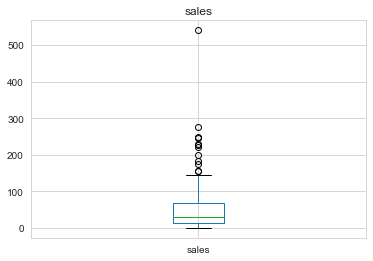

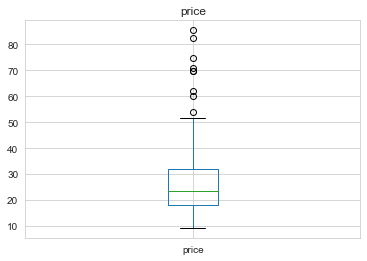

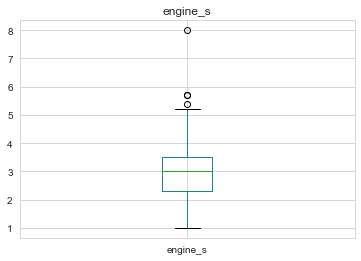

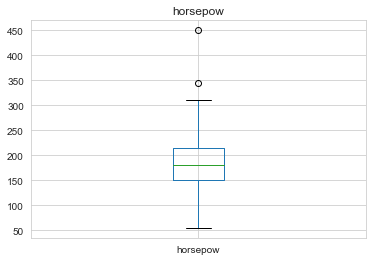

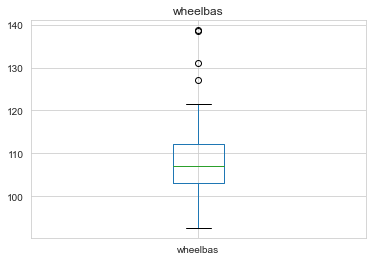

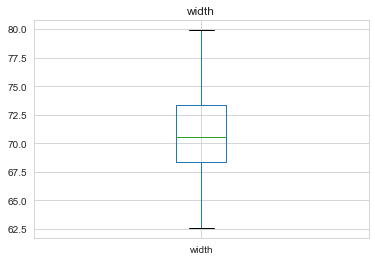

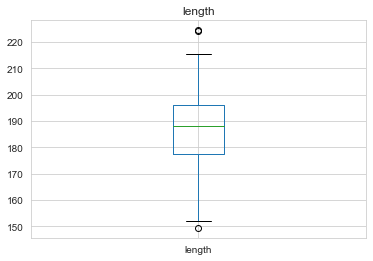

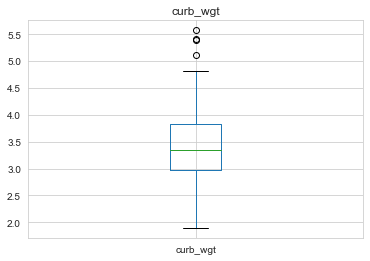

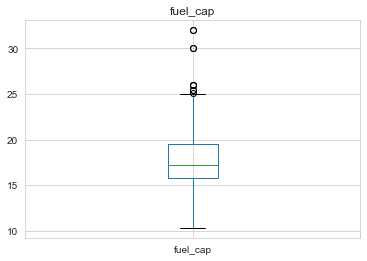

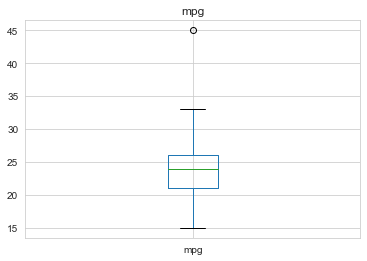

In [387]:
#Using the Whisker boxplot to determine outliers in the dataset
# Getting  numeric columns
num = df.select_dtypes(include=['float64','int'])

# Select only numeric columns
df_num = pd.DataFrame(num)

# Create boxplots 
for a in num:
    
    # Generating boxplot
    df_num.boxplot(column=a, return_type='dict')
    pp.title(a)
    pp.show()

A boxplot is a graphical representation of a dataset that displays the distribution of the data based on its quartiles. The box in the middle of the plot represents the interquartile range (IQR), which contains 50% of the data.<br>The line inside the box represents the median value, which splits the data into two halves. The whiskers extending from the box show the range of the data that is within 1.5 times the IQR, and any points outside of this range are considered outliers and are marked with a black dot.<br> Outliers are values that are significantly different from the rest of the data and may indicate errors or unusual circumstances that need further investigation but in our case .<br> While outliers typically indicate errors or unusual circumstances, in our case, they are likely due to unique features of the data. Therefore, we have chosen not to treat the outliers. The boxplot analysis provides valuable insights for further analysis and decision-making based on the data's distribution.

<Figure size 2160x1440 with 0 Axes>

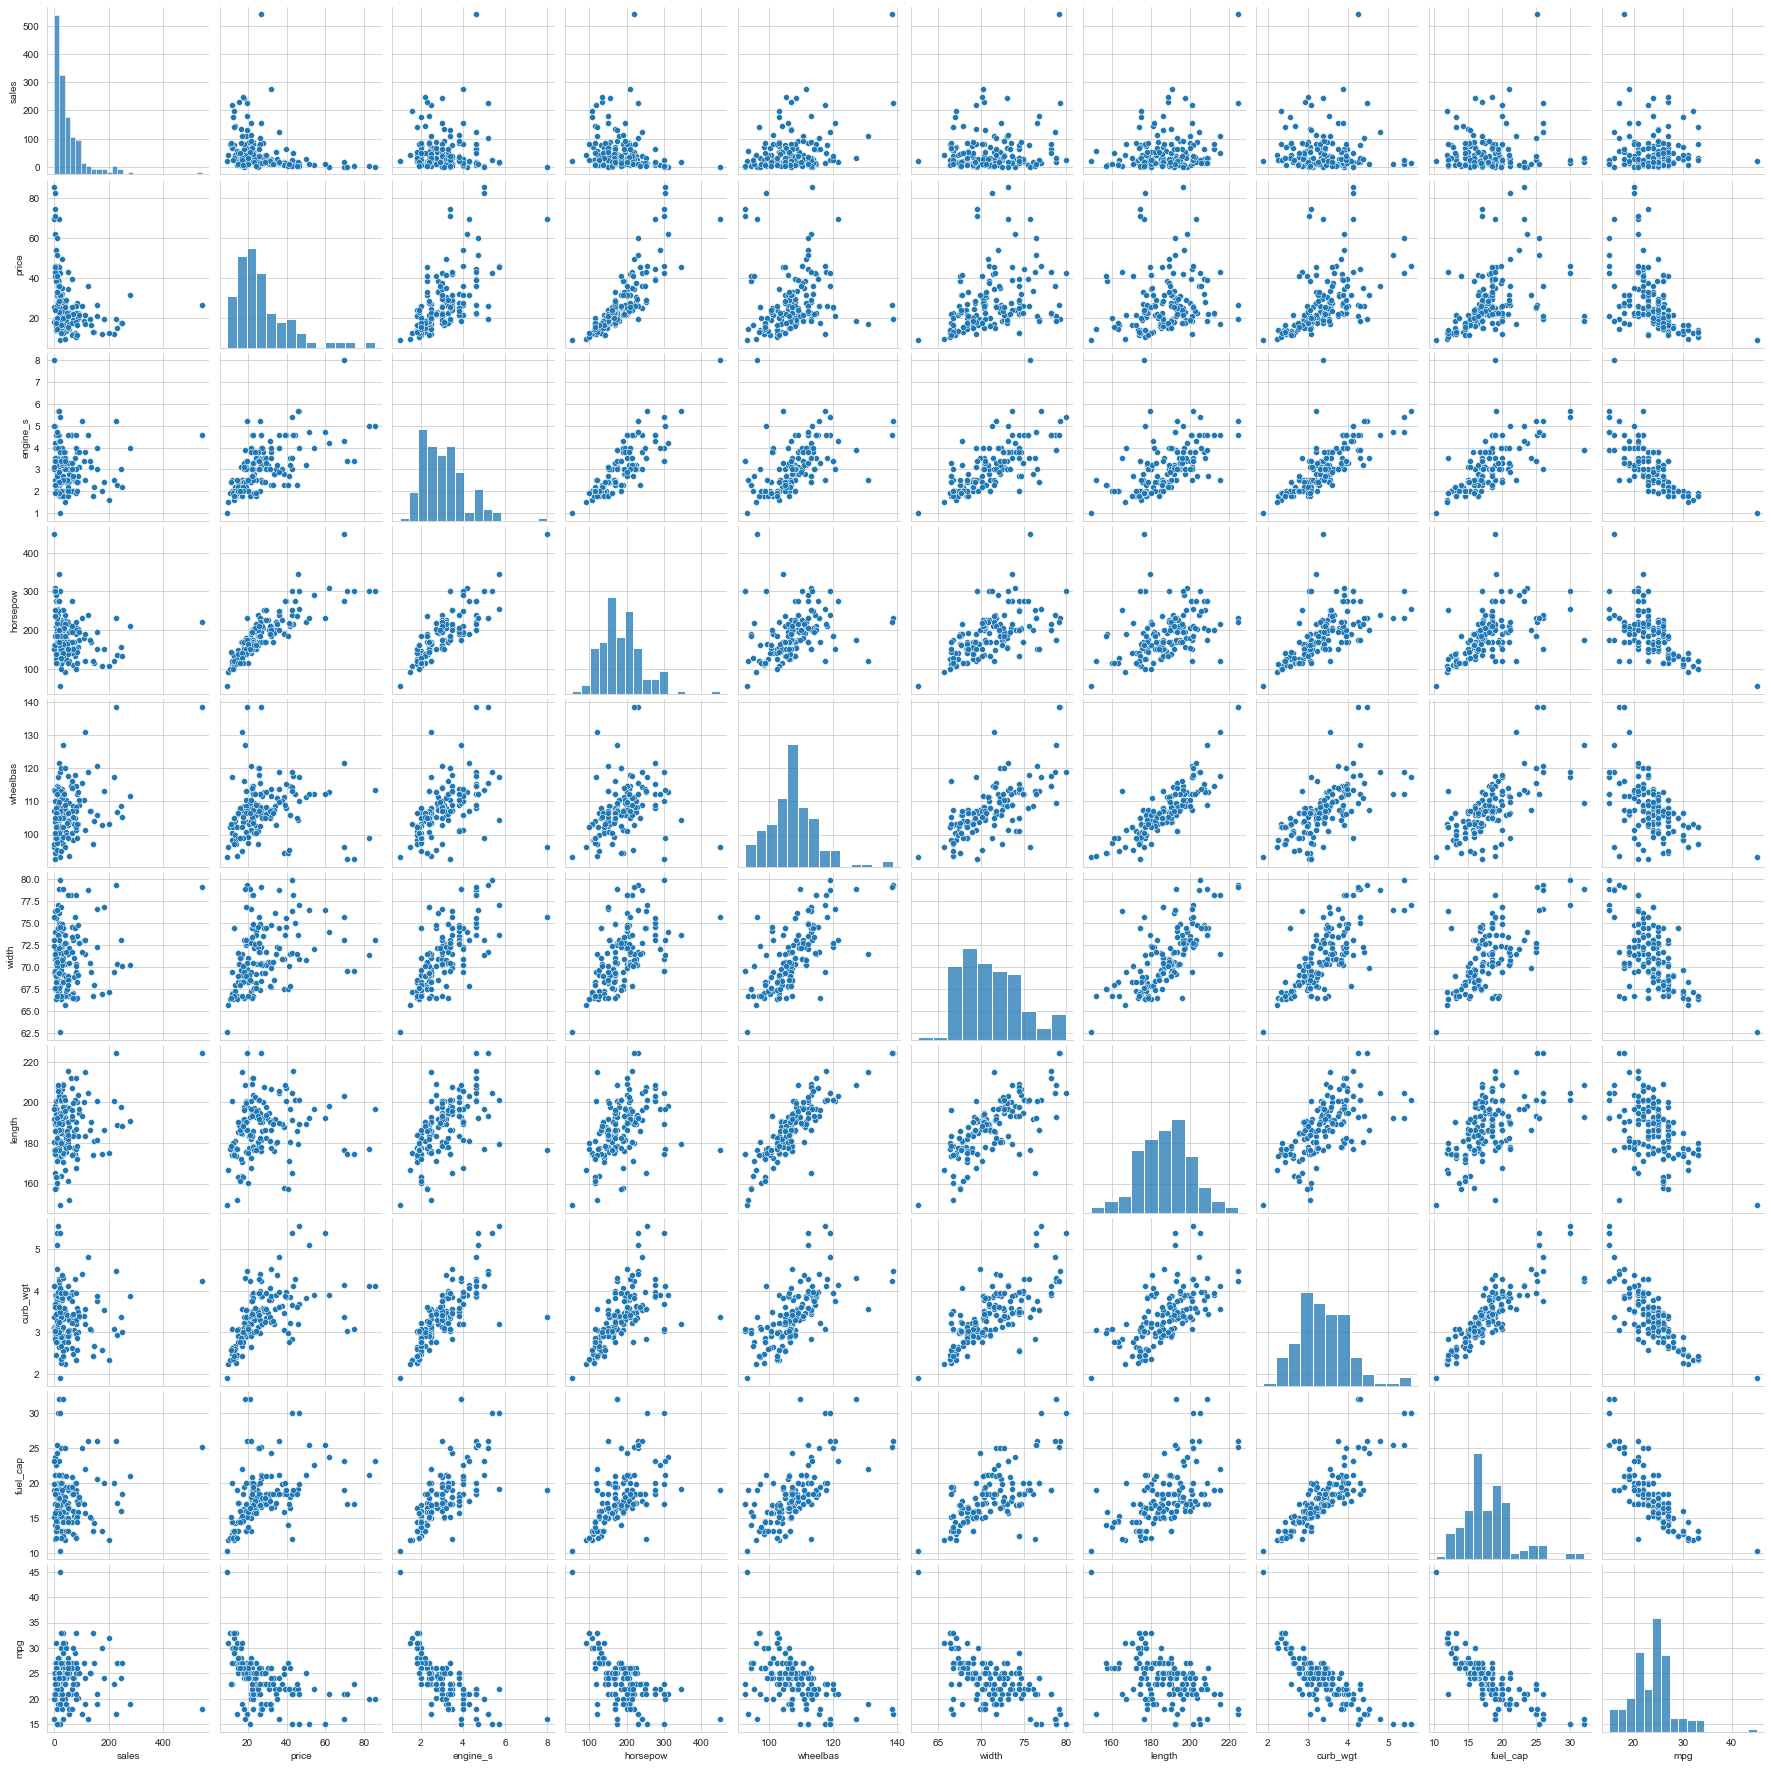

In [388]:
#Visualizing the relationship between the variables using the pairplot chart
pp.figure(figsize=(30,20))
sns.pairplot(df)
pp.show()

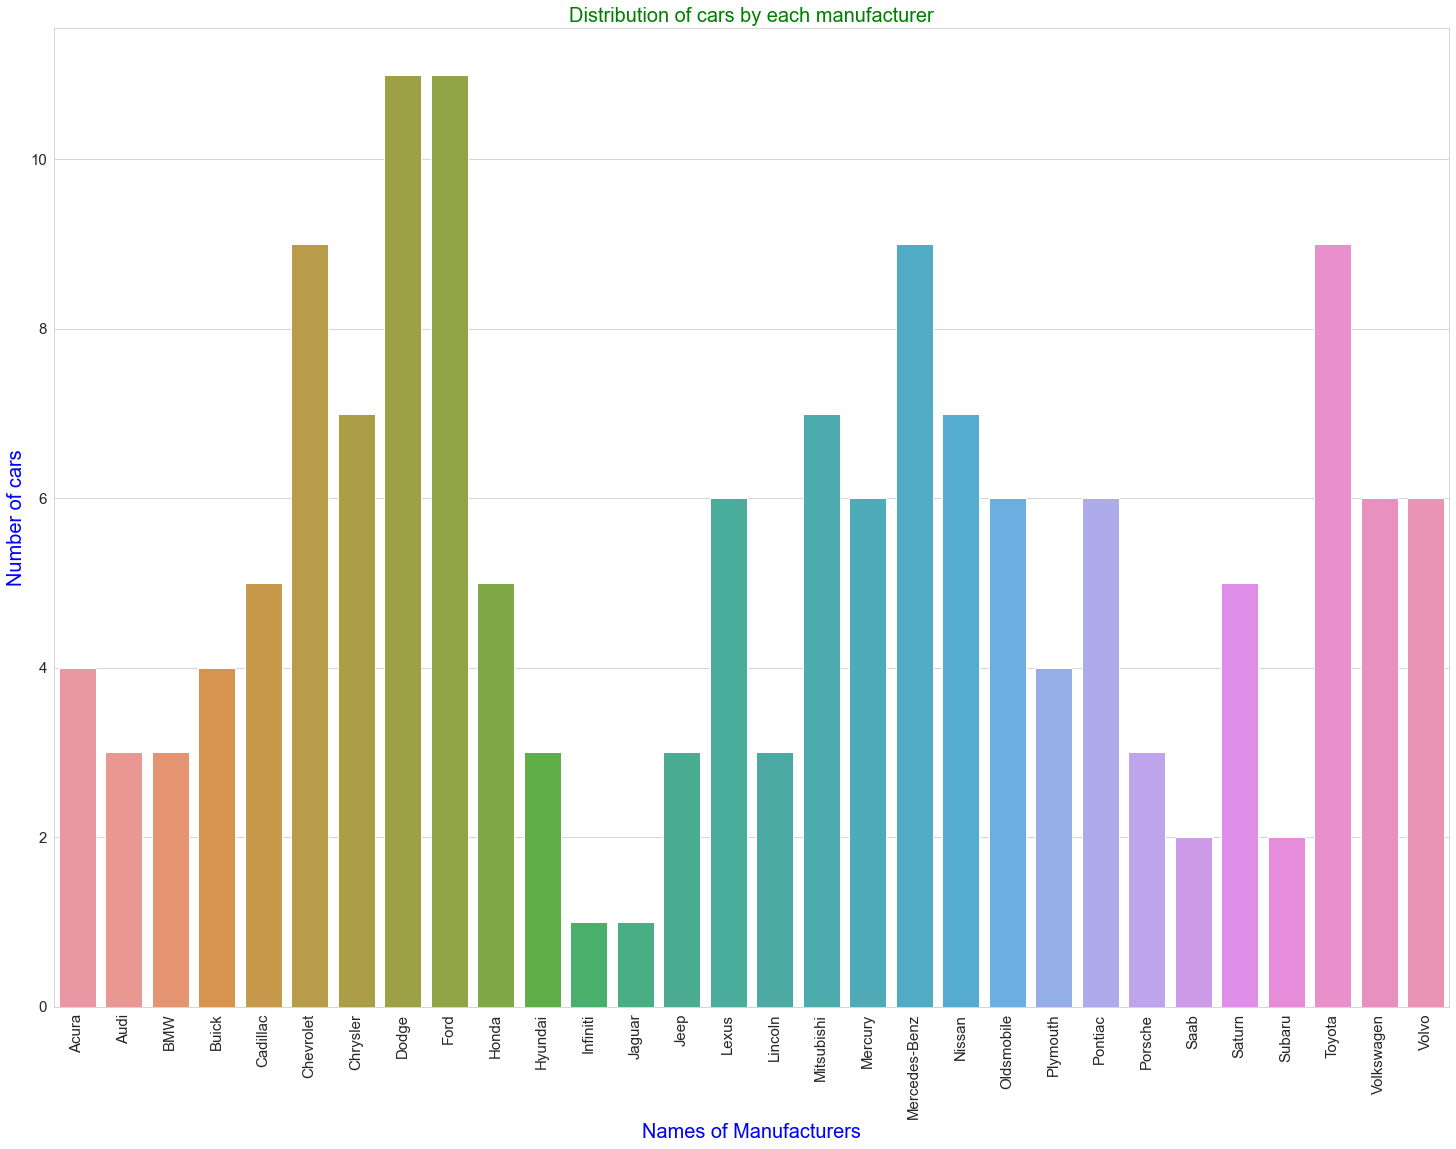

In [389]:
pp.figure(figsize=(25,18))
pp.title('Distribution of cars by each manufacturer',fontsize=20,color='g')
sns.countplot(x='manufact', data=df)
pp.xticks(rotation=90,fontsize=15)
pp.yticks(fontsize=15)
pp.ylabel('Number of cars',fontsize=20,color='b')
pp.xlabel('Names of Manufacturers',fontsize=20,color='b')
pp.show()

From the chart, it depicts that Dodge and Ford has the highest number of cars, Infiniti and  Jaguar has the least number of cars 

# Predictive Model

In [390]:
#importing the libraries for the linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [391]:
#Checking for correlation for our datasets again to pick the variables that relates with the target variables using the correlation matrix
df.corr()

,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
sales,1.000000,-0.305133,0.019967,-0.197734,0.358115,0.140891,0.254555,0.003503,0.086483,-0.019248
price,-0.305133,1.000000,0.627107,0.838765,0.109872,0.328113,0.155698,0.531551,0.423253,-0.487535
engine_s,0.019967,0.627107,1.000000,0.836838,0.471486,0.689534,0.539054,0.763341,0.663212,-0.730651
horsepow,-0.197734,0.838765,0.836838,1.000000,0.286483,0.539261,0.393377,0.615573,0.499260,-0.611141
wheelbas,0.358115,0.109872,0.471486,0.286483,1.000000,0.683287,0.839185,0.651203,0.652986,-0.499819
width,0.140891,0.328113,0.689534,0.539261,0.683287,1.000000,0.710390,0.723077,0.655089,-0.604207
length,0.254555,0.155698,0.539054,0.393377,0.839185,0.710390,1.000000,0.628520,0.560458,-0.449074
curb_wgt,0.003503,0.531551,0.763341,0.615573,0.651203,0.723077,0.628520,1.000000,0.859325,-0.815428
fuel_cap,0.086483,0.423253,0.663212,0.499260,0.652986,0.655089,0.560458,0.859325,1.000000,-0.797960
mpg,-0.019248,-0.487535,-0.730651,-0.611141,-0.499819,-0.604207,-0.449074,-0.815428,-0.797960,1.000000


We'll use the following features to predict the price: *engine_s*, *horsepow*, *wheelbas*, *width*, *length*, *curb_wgt*, *fuel_cap*, and *mpg*. These features are selected based on their relevance and the insights from the correlation analysis, indicating their potential impact on car price.

The manufacturer (manufact) feature can indeed be significant when predicting car prices, as it encapsulates the brand value, which is a critical determinant of a car's market price. Brand reputation, perceived quality, and customer loyalty towards certain manufacturers can significantly influence car prices. For example, luxury and premium brands typically command higher prices due to their brand prestige, perceived quality, and performance characteristics compared to more budget-oriented brands.

Excluding the manufacturer from the model might overlook these brand-specific effects on pricing. However, incorporating the manufacturer as a categorical variable would require transforming it into a format suitable for modeling, such as through one-hot encoding. This process converts categorical data into a format that can be provided to ML models to help capture the impact of each manufacturer on the car's price.

In [392]:
#Selecting the Independent variables
df_model=df[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','manufact']]

#Selecting the target variable
y=df['price']

In [393]:
#Transforming the categorical feature to numerical values
X = pd.get_dummies(df_model, columns=['manufact'], drop_first=True)

In [394]:
X

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,manufact_Audi,manufact_BMW,...,manufact_Oldsmobile,manufact_Plymouth,manufact_Pontiac,manufact_Porsche,manufact_Saab,manufact_Saturn,manufact_Subaru,manufact_Toyota,manufact_Volkswagen,manufact_Volvo
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,0,0,...,0,0,0,0,0,0,0,0,0,1
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,0,0,...,0,0,0,0,0,0,0,0,0,1
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [395]:
y

0      21.500000
1      28.400000
2      30.633333
3      42.000000
4      23.990000
         ...    
152    24.400000
153    27.500000
154    28.800000
155    45.500000
156    36.000000
Name: price, Length: 157, dtype: float64

In [396]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [397]:
# Training the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [398]:
# Predicting the prices for the testing set
y_pred = linear_reg.predict(X_test)

In [399]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [400]:
mse,r2

(56.58942785555515, 0.8353183306863594)

The R² value of 0.83 indicates that approximately 83% of the variability in car prices can be explained by the model, which is a relatively good fit for real-world data. However, the MSE indicates that on average, the model's predictions deviate from the actual prices by approximately $56.59 (keeping in mind that the price is in thousands of dollars).

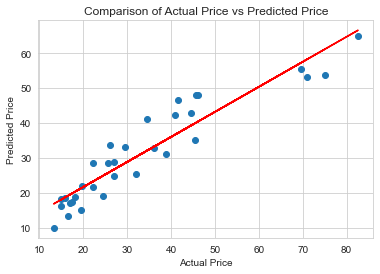

In [401]:
# Plotting Actual Price vs Predicted Price
pp.scatter(y_test, y_pred)

# Labels and title
pp.xlabel('Actual Price')
pp.ylabel('Predicted Price')
pp.title('Comparison of Actual Price vs Predicted Price')

# Calculate and plot the line of best fit
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
pp.plot(y_test, p(y_test), color='red') # Line of Best Fit

pp.show()

The scatter plot above compares the actual car prices against the predicted prices from our linear regression model, with the red line representing the line of best fit. This line illustrates how well the model's predictions match up with the actual prices. The closer the data points are to this line, the more accurate the model's predictions are.

### Recommendations for Frankot Motors:

<b>Focus on Key Features</b>: The analysis indicates that engine size, horsepower, dimensions, curb weight, fuel capacity, and mpg are significant predictors of a car's price. Focus on these aspects when selecting or promoting cars to potential buyers.<br>

<b>Pricing Strategy</b>: Utilize the predictive model to set competitive prices for the cars. By inputting the car's features into the model, you can get an estimated price that is aligned with market trends and consumer expectations.<br>

<b>Continuous Model Improvement</b>: Collect and analyze more data over time, especially focusing on sales performance, customer preferences, and competitor pricing strategies. This can help in refining the predictive model for even more accurate pricing strategies in the future.<br>

<b>Marketing Emphasis</b>: Highlight the features that are most valued by customers (such as fuel efficiency for mpg-sensitive buyers or engine power for performance-oriented customers) in marketing campaigns to enhance the appeal of your vehicles.<br>

In [402]:
# Ensuring the model is trained with the specified features
# We've already prepared and trained a model using these exact features in the previous step.
# Now, let's create a function that will accept inputs for these features and predict the car price.

def predict_car_price(engine_size, horsepower, wheelbase, width, length, curb_weight, fuel_capacity, mpg, manufacturer):
    """
    Predicts the car price based on the input features.
    
    Parameters:
    - engine_size: Engine size in liters.
    - horsepower: Horsepower of the car.
    - wheelbase: Wheelbase of the car in inches.
    - width: Width of the car in inches.
    - length: Length of the car in inches.
    - curb_weight: Curb weight of the car in tons.
    - fuel_capacity: Fuel capacity of the car in gallons.
    - mpg: Miles per gallon.
    - manufacturer: Manufacturer of the car.
    
    Returns:
    - Predicted price of the car.
    """
    # Create a dataframe with the input values
    input_data = pd.DataFrame({
        'engine_s': [engine_size],
        'horsepow': [horsepower],
        'wheelbas': [wheelbase],
        'width': [width],
        'length': [length],
        'curb_wgt': [curb_weight],
        'fuel_cap': [fuel_capacity],
        'mpg': [mpg],
        'manufact': [manufacturer]
    })
    
    # Use the trained pipeline to predict the price
    predicted_price = linear_reg.predict(input_data)[0]
    
    return predicted_price

In [403]:
predict_car_price(engine_size=3.5, 
    horsepower=300, 
    wheelbase=112, 
    width=75, 
    length=196, 
    curb_weight=3.5, 
    fuel_capacity=18, 
    mpg=25, 
    manufacturer=9)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 37 is different from 9)